In [190]:
using Images, ImageDraw
using Colors
using FileIO
using Interpolations
using Plots

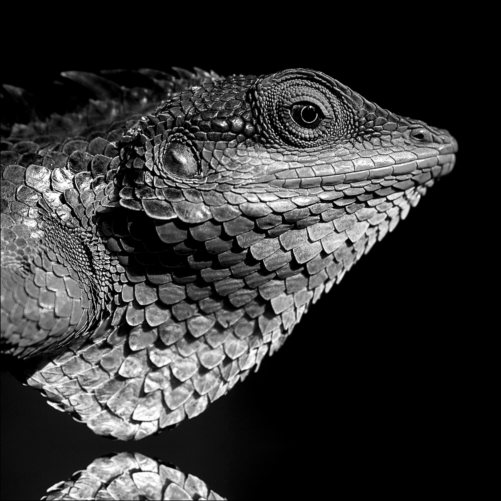

In [169]:
# specify the path to your local image file and load it:
img_path = "./images/input/lizard.jpg"
img = load(img_path)
img_grey = Gray{Float32}.(img)

# Hough transform most simple example
detecting one line:

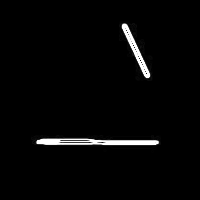

In [244]:
include("imageops.jl")
img = load("./images/input/geom2.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

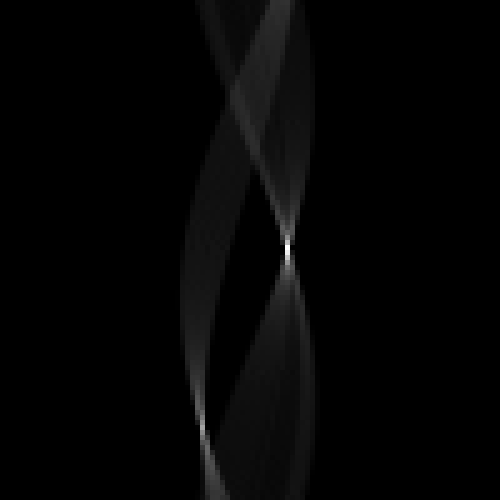

In [234]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

In [235]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 10, size(img))

(phi, r, m, n) = (2.638937829015426, -50.911688126222145, 1.8189932472810648, -105.67991665274326)
(phi, r, m, n) = (1.5079644737231006, 45.2548341151483, -0.0629146672536499, 45.34431075449977)
(phi, r, m, n) = (2.73318560862312, -50.911688126222145, 2.3108636538824108, -128.19327340464415)
(phi, r, m, n) = (2.670353755551324, -50.911688126222145, 1.9626105055051501, -112.14262887754269)
(phi, r, m, n) = (1.6650441064025905, 45.2548341151483, 0.09452783117928212, 45.456571990665516)
(phi, r, m, n) = (2.701769682087222, -50.911688126222145, 2.125108173157201, -119.5729551314761)
(phi, r, m, n) = (1.5393804002589986, 45.2548341151483, -0.03142626604335125, 45.2771756681507)
(phi, r, m, n) = (1.6336281798666925, 45.2548341151483, 0.06291466725364979, 45.34431075449977)
(phi, r, m, n) = (1.6022122533307945, 45.2548341151483, 0.03142626604335113, 45.2771756681507)
(phi, r, m, n) = (1.5707963267948966, 45.2548341151483, -6.123233995736766e-17, 45.2548341151483)


10-element Vector{Tuple{Float64, Float64}}:
 (1.8189932472810648, -105.67991665274326)
 (-0.0629146672536499, 45.34431075449977)
 (2.3108636538824108, -128.19327340464415)
 (1.9626105055051501, -112.14262887754269)
 (0.09452783117928212, 45.456571990665516)
 (2.125108173157201, -119.5729551314761)
 (-0.03142626604335125, 45.2771756681507)
 (0.06291466725364979, 45.34431075449977)
 (0.03142626604335113, 45.2771756681507)
 (-6.123233995736766e-17, 45.2548341151483)

(x1, y1, x2, y2) = (0, -188, 200, 176)
(x1, y1, x2, y2) = (0, 151, 200, 139)
(x1, y1, x2, y2) = (0, -260, 200, 202)
(x1, y1, x2, y2) = (0, -209, 200, 184)
(x1, y1, x2, y2) = (0, 136, 200, 154)
(x1, y1, x2, y2) = (0, -233, 200, 192)
(x1, y1, x2, y2) = (0, 148, 200, 142)
(x1, y1, x2, y2) = (0, 139, 200, 151)
(x1, y1, x2, y2) = (0, 142, 200, 148)
(x1, y1, x2, y2) = (0, 145, 200, 145)


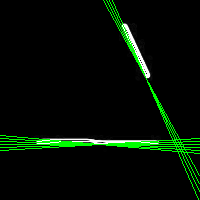

In [236]:
function plot_img_and_linear_functions(img, mn_list)
    img2 = RGB{Float32}.(copy(img))
    (h, w) = size(img)
 
    for (m, n) in mn_list
        if abs(n) < 1e16

            x1 = -w ÷ 2
            x2 = w ÷ 2
        
            y1 = floor(Int, m * x1 + n)
            y2 = floor(Int, m * x2 + n)

            (x1, y1) = rel_pos_to_abs((x1, y1), (w, h))
            (x2, y2) = rel_pos_to_abs((x2, y2), (w, h))
            @show x1, y1, x2, y2
            draw!(img2, LineTwoPoints(Point(x1, y1), Point(x2, y2)), RGB{Float32}(0.0, 1.0, 0.0))
        end
    end
    return img2
end


plot_img_and_linear_functions(img, top_k_line_params)

(phi, r, m, n) = (1.6022122533307945, 45.2548341151483, 0.03142626604335113, 45.2771756681507)
(phi, r, m, n) = (1.5707963267948966, 45.2548341151483, -6.123233995736766e-17, 45.2548341151483)
(x1, y1, x2, y2) = (0, 142, 200, 148)
(x1, y1, x2, y2) = (0, 145, 200, 145)


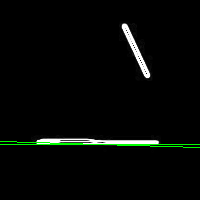

In [237]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 2, size(img))
plot_img_and_linear_functions(img, top_k_line_params)

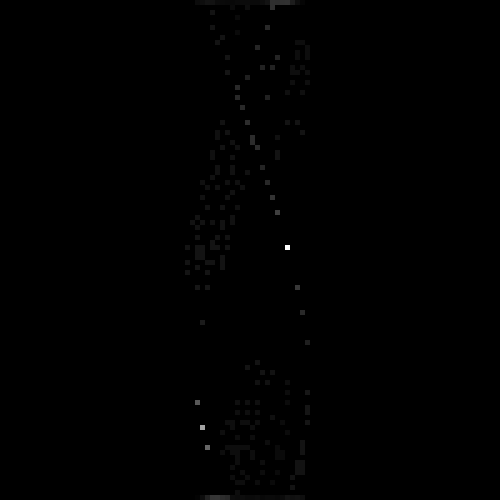

In [246]:
suppressed_acc_matrix = non_maximum_suppression(acc_matrix)
imresize(Gray.(suppressed_acc_matrix), (500, 500), method=Interpolations.Constant())

(phi, r, m, n) = (2.701769682087222, -50.911688126222145, 2.125108173157201, -119.5729551314761)
(phi, r, m, n) = (1.5707963267948966, 45.2548341151483, -6.123233995736766e-17, 45.2548341151483)
(x1, y1, x2, y2) = (0, -233, 200, 192)
(x1, y1, x2, y2) = (0, 145, 200, 145)


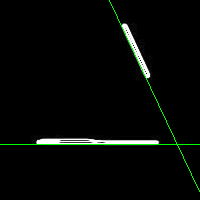

In [248]:
top_k_line_params = top_k_line_params_from_acc_matrix(suppressed_acc_matrix, 2, size(img))
plot_img_and_linear_functions(img, top_k_line_params)

## detecting the edges of some shapes

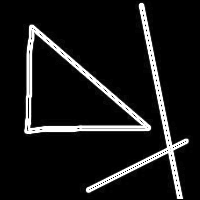

In [254]:
include("imageops.jl")
img = load("./images/input/geom.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

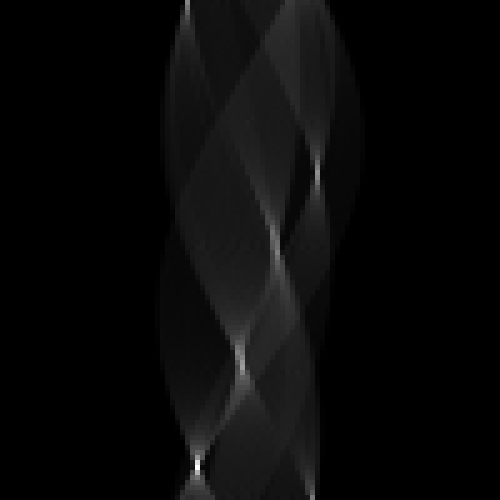

In [251]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

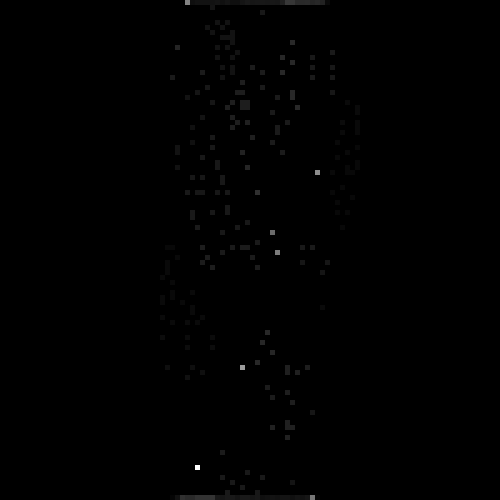

In [252]:
acc_matrix = non_maximum_suppression(acc_matrix)
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

(phi, r, m, n) = (1.6022122533307945, 33.94112561616362, 0.03142626604335113, 33.95788178093013)
(phi, r, m, n) = (0.031415926535897934, -67.88225087469928, -31.82051595377396, -2161.1146265473903)
(phi, r, m, n) = (1.0995574287564276, 79.19595961210263, -0.5095254494944289, 88.88370338729393)
(phi, r, m, n) = (2.324778563656447, -5.6568541302830795, 0.9390625058174926, -7.760078990358104)
(phi, r, m, n) = (2.9530970943744053, -56.568542375714514, 5.242183581113166, -301.8899856732246)
(x1, y1, x2, y2) = (0, 130, 200, 137)
(x1, y1, x2, y2) = (0, 1120, 200, -5244)
(x1, y1, x2, y2) = (0, 239, 200, 137)
(x1, y1, x2, y2) = (0, -2, 200, 186)
(x1, y1, x2, y2) = (0, -727, 200, 322)


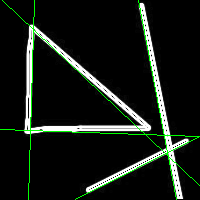

In [253]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 5, size(sobel_img))
plot_img_and_linear_functions(img, top_k_line_params)

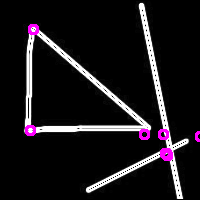

In [272]:
points = line_params_to_corner_points(top_k_line_params)

function plot_img_and_points(img, points)
    img2 = RGB{Float32}.(copy(img))
    (h, w) = size(img)

    for (x,y) in points
        x = floor(Int, x)
        y = floor(Int, y)
        (x, y) = rel_pos_to_abs((x, y), (w, h))
        draw!(img2, Ellipse(CirclePointRadius(x, y, 6; thickness = 4, fill = false)), RGB{Float32}(1.0,0.0,1.0))
    end
    return img2
end

plot_img_and_points(img,points)

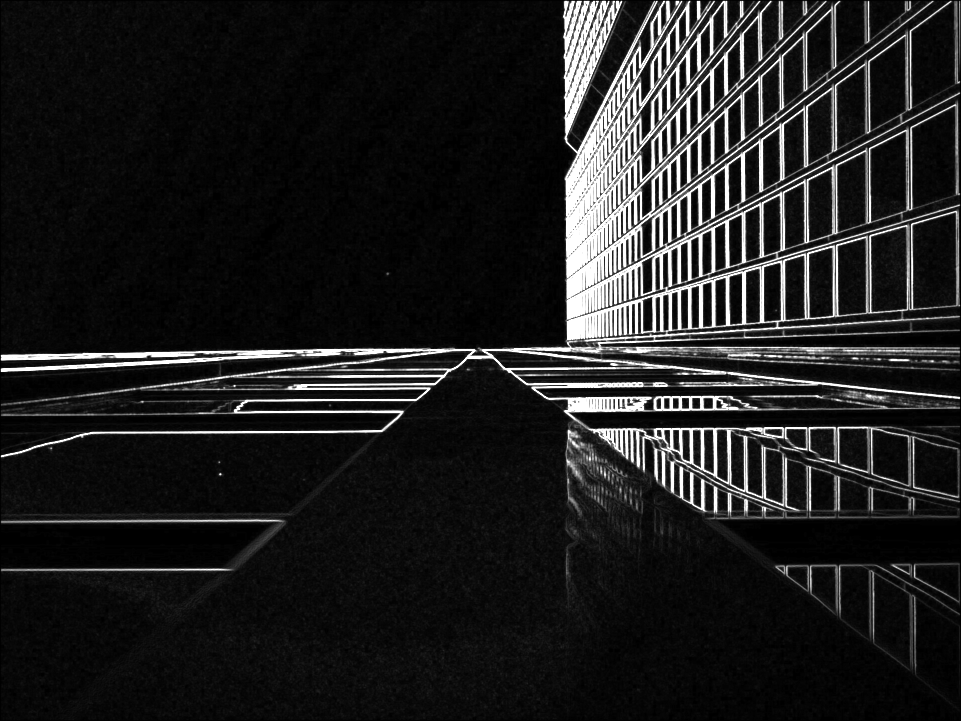

In [279]:
include("imageops.jl")
img = load("./images/input/house.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

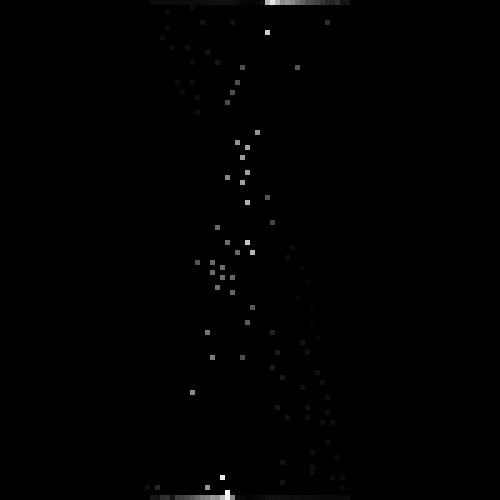

In [290]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
acc_matrix = non_maximum_suppression(acc_matrix)
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

In [317]:
line_params = line_params_from_acc_matrix(acc_matrix, Float32(0.4), size(img))

(phi, r, m, n) = (2.4818581963359367, -527.9999998807907, 1.289192231785067, -861.4683037727618)
(phi, r, m, n) = (3.141592653589793, -479.9999998807907, 8.165619676597685e15, -3.919497443793471e18)
(phi, r, m, n) = (3.141592653589793, -431.99999988079094, 8.165619676597685e15, -3.527547699316784e18)
(phi, r, m, n) = (2.1048670779051615, -383.9999998807907, 0.5913983513994712, -446.12669979344616)
(phi, r, m, n) = (3.078760800517997, -383.9999998807907, 15.894544843865251, -6115.572904306379)
(phi, r, m, n) = (3.141592653589793, -383.9999998807907, 8.165619676597685e15, -3.135597954840093e18)
(phi, r, m, n) = (1.6650441064025905, -335.9999998807907, 0.09452783117928211, -337.49782718421784)
(phi, r, m, n) = (1.7278759594743864, -335.9999998807907, 0.1583844403245365, -340.18828214407375)
(phi, r, m, n) = (2.261946710584651, -335.9999998807907, 0.8272719459724758, -436.07297217935417)
(phi, r, m, n) = (3.141592653589793, -335.9999998807907, 8.165619676597685e15, -2.7436482103634043e18)


41-element Vector{Tuple{Float64, Float64}}:
 (1.289192231785067, -861.4683037727618)
 (8.165619676597685e15, -3.919497443793471e18)
 (8.165619676597685e15, -3.527547699316784e18)
 (0.5913983513994712, -446.12669979344616)
 (15.894544843865251, -6115.572904306379)
 (8.165619676597685e15, -3.135597954840093e18)
 (0.09452783117928211, -337.49782718421784)
 (0.1583844403245365, -340.18828214407375)
 (0.8272719459724758, -436.07297217935417)
 (8.165619676597685e15, -2.7436482103634043e18)
 (0.2567563603677266, -297.3415308451179)
 (8.165619676597684e15, -2.3516984658867154e18)
 (0.1263293784461083, -241.9075128740746)
 ⋮
 (-0.29052685673191675, 1.2413836655267253e-7)
 (-0.03142626604335125, 1.1926814117874435e-7)
 (0.03142626604335113, 48.02369691465107)
 (-0.881618592363189, 127.98104708213873)
 (-31.820515953773963, 6112.555243941918)
 (-4.473742829211554, 880.1556210957282)
 (-31.820515953773963, 7640.694053978604)
 (-31.820515953773963, 9168.832864015305)
 (-31.820515953773963, 10696.97

(x1, y1, x2, y2) = (0, -1380, 1920, 1096)
(x1, y1, x2, y2) = (0, -294, 1920, 841)
(x1, y1, x2, y2) = (0, -20655, 1920, 9863)
(x1, y1, x2, y2) = (0, 291, 1920, 473)
(x1, y1, x2, y2) = (0, 227, 1920, 531)
(x1, y1, x2, y2) = (0, -511, 1920, 1078)
(x1, y1, x2, y2) = (0, 176, 1920, 669)
(x1, y1, x2, y2) = (0, 356, 1920, 599)
(x1, y1, x2, y2) = (0, 292, 1920, 658)
(x1, y1, x2, y2) = (0, -8795, 1920, 6404)
(x1, y1, x2, y2) = (0, 959, 1920, 56)
(x1, y1, x2, y2) = (0, 558, 1920, 497)
(x1, y1, x2, y2) = (0, -35941, 1920, 25155)
(x1, y1, x2, y2) = (0, 390, 1920, 756)
(x1, y1, x2, y2) = (0, 291, 1920, 848)
(x1, y1, x2, y2) = (0, 1343, 1920, -147)
(x1, y1, x2, y2) = (0, 593, 1920, 654)
(x1, y1, x2, y2) = (0, 1272, 1920, 53)
(x1, y1, x2, y2) = (0, 1083, 1920, 252)
(x1, y1, x2, y2) = (0, 1417, 1920, 22)
(x1, y1, x2, y2) = (0, 1209, 1920, 230)
(x1, y1, x2, y2) = (0, 998, 1920, 441)
(x1, y1, x2, y2) = (0, 750, 1920, 689)
(x1, y1, x2, y2) = (0, 737, 1920, 798)
(x1, y1, x2, y2) = (0, 1694, 1920, 1)
(x1, 

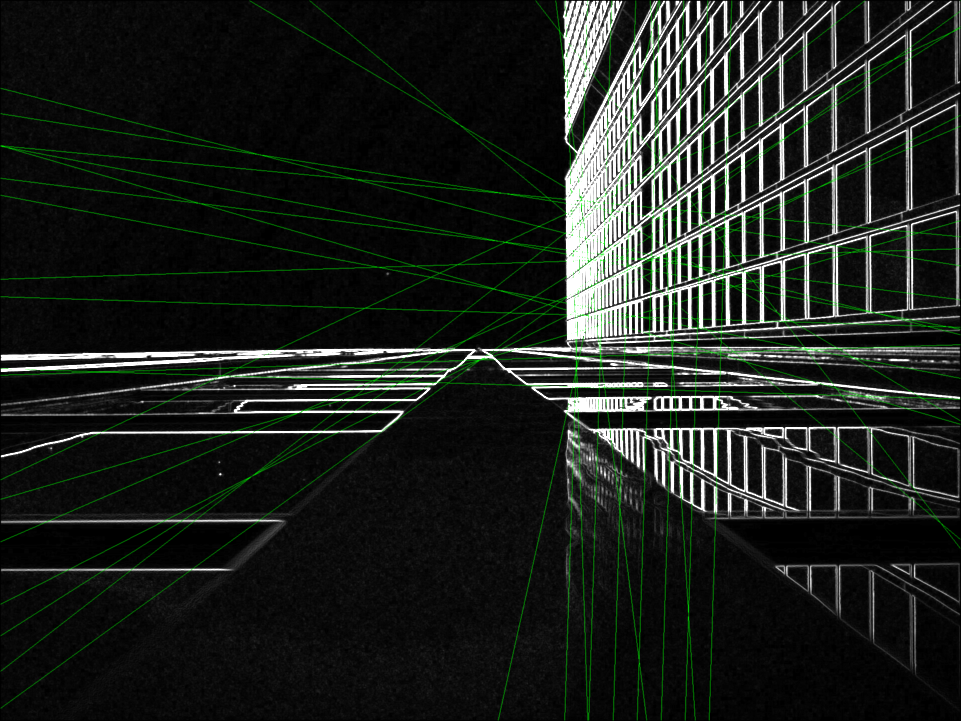

In [318]:
plot_img_and_linear_functions(img, line_params)